<a href="https://colab.research.google.com/github/Hamza-t/Deep-Learning-Labs/blob/main/TP_N%C2%B01_Perceptron_mono_couche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP N°1 : Perceptron mono-couche


---
    


**Objectif :**


Ce TP a pour objectif d’introduire les bases de la théorie des réseaux de neurones et d’introduire
le cas particulier du perceptron. Nous allons examiner l'algorithme Perceptron, qui est le réseau
de neurones à une seule couche le plus élémentaire utilisé pour la classification binaire. Tout
d'abord, nous examinerons la fonction d’activation et verrons comment l'algorithme Perceptron
fait la classification, puis nous examinerons la règle de mise à jour du perceptron. Enfin, nous
tracerons la frontière de décision pour nos données. Nous utiliserons les données avec
seulement deux caractéristiques, et il y aura deux classes puisque Perceptron est un classifieur
binaire. Nous allons implémenter tout le code en utilisant Python NumPy et visualiser/tracer en
utilisant Matplotlib.

##I / Dataset :

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
def generate_dataset(mu1, mu2, sigma1, sigma2):
    #générer le dataset s selon la distribution gaussienne composé de 250 points xi = (x1, x2) 
    #et leurs classes yi = -1 pour les premières 125 xi et yi = 1 pour les dernières 125 xi :
    s1 = np.random.normal(mu1, sigma1, size=(125, 2))
    s2 = np.random.normal(mu2, sigma2, size=(125, 2))
    s = np.concatenate((s1, s2), axis=0)

    y = np.array([])
    for i in range(250):
      if i < 125:
        y = np.append(y, 1)
      else:
        y = np.append(y, 0)

    #diviser le dataset en train and test sets, contenant 80 % et 20 % du dataset :
    training_data, testing_data, training_y, testing_y = train_test_split(s, y, test_size=0.2, random_state=42)

    return (s, y, training_data, testing_data, training_y, testing_y)

##II / Implementation :

###Implementation de l'algorithme de perceptron :

---



In [ ]:
#La fonction de Heaviside
def acti_func(z): 
  if z>0 : return 1
  else : return 0

In [ ]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape    
    # Initializing parapeters(w) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []   
    # Training.
    for epoch in range(epochs):       
        # variable to store #misclassified.
        n_miss = 0       
        # looping for every example.
        for idx, x_i in enumerate(X):           
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)           
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))          
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                w += lr*((y[idx] - y_hat)*x_i)              
                # Incrementing by 1.
                n_miss += 1      
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)     
    return w, n_miss_list

###Implemetation du traçage de la limite de décision :

---



In [ ]:
def plot_decision_boundary(X, y, y_name, w):
      # X --> Inputs
      # w --> parameters
      # The Line is y=mx+c
      # So, Equate mx+c = w0.X0 + w1.X1 + w2.X2
      # Solving we find m and c
      x1 = [min(X[:,0]), max(X[:,0])]
      m = -w[1]/w[2]
      c = -w[0]/w[2]
      x2 = m*x1 + c
      # Plotting
      fig = plt.figure(figsize=(10,8))
      plt.plot(X[:, 0][y==y_name[0]], X[:, 1][y==y_name[0]], "r^")
      plt.plot(X[:, 0][y==y_name[1]], X[:, 1][y==y_name[1]], "bs")
      plt.xlabel("feature 1")
      plt.ylabel("feature 2")
      plt.title('Perceptron Algorithm')
      plt.plot(x1, x2)

###Implementation de l'algorithme de prediction :

---



In [ ]:
def prediction(X,w):
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    test_predict =[]
    for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            test_predict.append(y_hat)
    return test_predict

###Implementation de l'algorithme d'entrainement du modèle :

---



In [ ]:
def repeat_perceptron(mu1, mu2, sigma1, sigma2, nb):
  error_tab = np.array([])
  for i in range(nb): 
    dataset = generate_dataset(mu1, mu2, sigma1, sigma2)
    w, miss_l = perceptron(data1_training_data, data1_training_y, 0.5, 100)
    predicted_y = prediction(dataset[3], w)
    error = 1 - accuracy_score(dataset[-1], predicted_y)
    error_tab = np.append(error_tab, error)
  mean = np.mean(error_tab)
  std = np.std(error_tab)
  return mean, std

##III / Les expériences traitées :

###Experience 1 : Générer un dataset pour σ1² = σ2² = 0.25 :

---






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


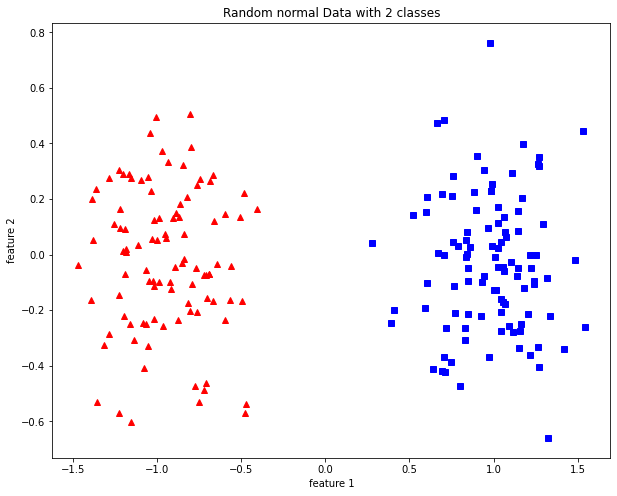

In [ ]:
data1 = np.array(generate_dataset((-1, 0), (1, 0), 0.25, 0.25))
data1_training_data = data1[2]
data1_testing_data = data1[3]
data1_training_y = data1[4]
data1_testing_y = data1[5]

#plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(data1_training_data[:, 0][data1_training_y == 1], data1_training_data[:, 1][data1_training_y == 1], 'r^')
plt.plot(data1_training_data[:, 0][data1_training_y == 0], data1_training_data[:, 1][data1_training_y == 0], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random normal Data with 2 classes')
plt.show()

####L'algorithme converge-t-il ? Pourquoi ?

oui l'algorithme de perceptron va converger car les deux classes peuvent être séparées par une droite

In [ ]:
w, miss_l = perceptron(data1_training_data, data1_training_y, 0.5, 100)

####Tracez la limite de décision trouvée par votre algorithme :

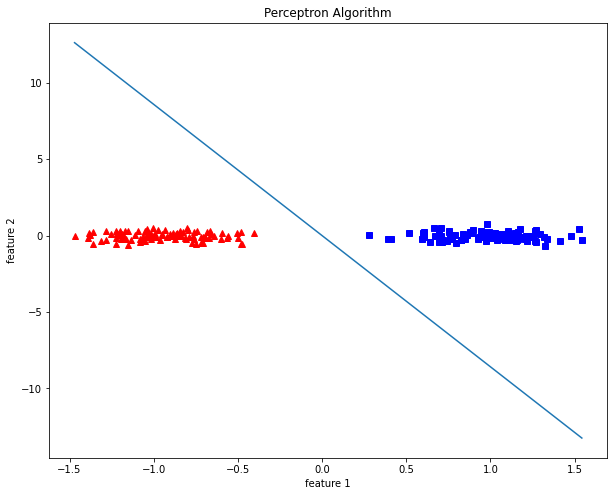

In [ ]:
plot_decision_boundary(data1_training_data, data1_training_y, [1,0], w)

####Cette limite de décision est-elle unique ?

la limite de décision n'est pas unique car on peut trouver d'autres droites qui séparent les 2 classes

####La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

comme la limite de décision n'est pas unique alors la modification de l'initialisation va modifier le résultat de l'algorithme 

####Calculer la justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
data1_predicted_y = prediction(data1_testing_data, w)
score = accuracy_score(data1_testing_y, data1_predicted_y)
print( 'accuracy = ', score*100 , '%')

accuracy =  100.0 %


####Tracez la limite de décision sur l'ensemble de test :

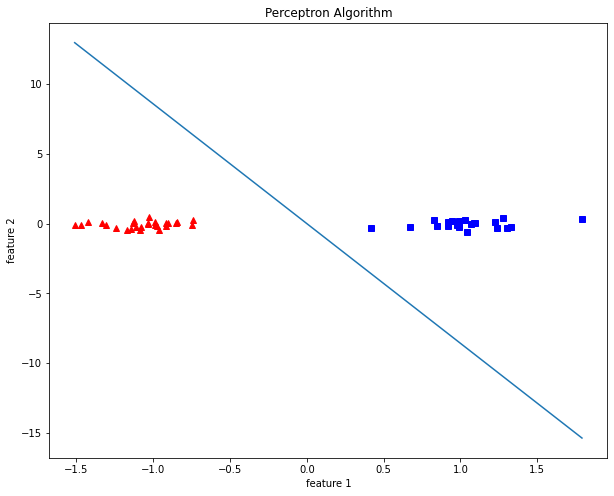

In [ ]:
plot_decision_boundary(data1_testing_data, data1_testing_y, [1,0], w)

###Experience 2 : Générer un dataset pour σ1² = σ2² = 0.75 :

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


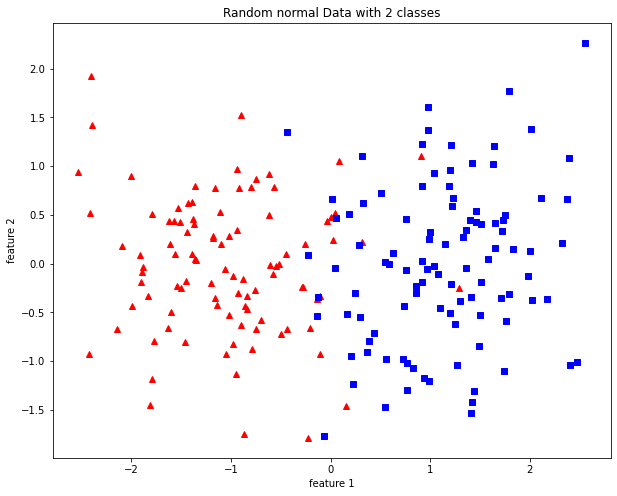

In [ ]:
data2 = np.array(generate_dataset((-1, 0), (1, 0), 0.75, 0.75))
data2_training_data = data2[2]
data2_testing_data = data2[3]
data2_training_y = data2[4]
data2_testing_y = data2[5]

#plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(data2_training_data[:, 0][data2_training_y == 1], data2_training_data[:, 1][data2_training_y == 1], 'r^')
plt.plot(data2_training_data[:, 0][data2_training_y == 0], data2_training_data[:, 1][data2_training_y == 0], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random normal Data with 2 classes')
plt.show()

####L'algorithme converge-t-il ? Pourquoi ?

non l'algorithme de perceptron ne va pas converger car les deux classes ne peuvent pas être séparées par une droite

In [ ]:
w, miss_l = perceptron(data2_training_data, data2_training_y, 0.5, 100)

####Tracez la limite de décision trouvée par votre algorithme :

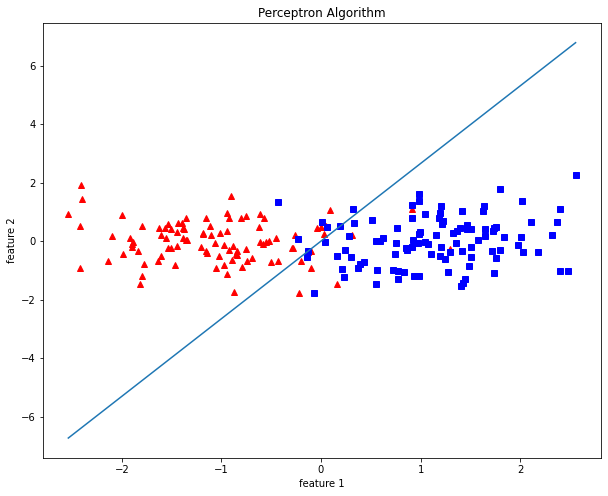

In [ ]:
plot_decision_boundary(data2_training_data, data2_training_y, [1,0], w)

####Cette limite de décision est-elle unique ?

la limite de décision n'est pas unique

####La modification de l'initialisation modifie-t-elle le résultat de l'algorithme ?

comme la limite de décision n'est pas unique alors la modification de l'initialisation va modifier le résultat de l'algorithme 

####Calculer la justesse (accuracy) de la classification sur l'ensemble de test :

In [ ]:
data2_predicted_y = prediction(data2_testing_data, w)
score = accuracy_score(data2_testing_y, data2_predicted_y)
print( 'accuracy = ', score*100 , '%')

accuracy =  86.0 %


####Tracez la limite de décision sur l'ensemble de test :

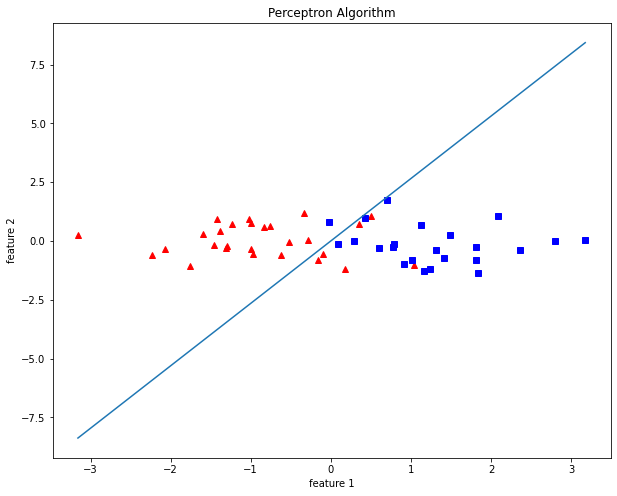

In [ ]:
plot_decision_boundary(data2_testing_data, data2_testing_y, [1,0], w)

###Experience 3 :

---



Nous définissons une expérience comme suit
*   Générez les données et entraînez votre modèle.
*   Calculez l'erreur sur l'ensemble de test.

Afin d'étudier l'impact de la variation de σ1² et σ2² sur les performances du système, nous stockons l'erreur sur plusieurs expériences (prendre nb_expérience = 30). Puis on calcule la moyenne et la variance des erreurs stockées. Pour chaque σ1² et σ2² ∈ [0.01, 0.1, 0.5, 0.7] calculez la moyenne et la variance puis tracez les résultats en utilisant matplotlib.pyplot.errorbar.

[0.         0.         0.02333333 0.07533333]
[0.         0.         0.02070963 0.03253033]


<ErrorbarContainer object of 3 artists>

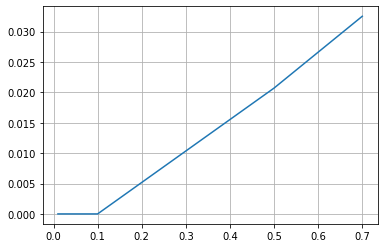

In [ ]:
#entrainer le modèle  
mean_tab = np.array([])
std_tab = np.array([])
for i in [0.01, 0.1, 0.5, 0.7]: 
  mean, std = repeat_perceptron((-1, 0), (1, 0), i, i, 30)
  mean_tab = np.append(mean_tab, mean)
  std_tab = np.append(std_tab, std)

#l'erreur stockée sur 30 expériences pour chaque valeur de σ²
print(mean_tab)
print(std_tab)

#plotting
plt.grid()
plt.errorbar([0.01, 0.1, 0.5, 0.7], std_tab)

##IV / Commentaires et Conclusion : 

d'après l'expérience 3 on constate qu'après entrainement du modèle pour différentes valeur de σ², à partir d'un certain seuil, plus σ² augmente plus l'erreur augmente.

Ainsi, pour des paramètres d'initialisation du dataset fixés, on doit chercher σ² la plus adaptée pour avoir une erreur minimale.